# Customer Analysis

In [1]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Guardar en html > pio.write_html(fig, 'grafico.html')
import plotly.io as pio

# Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
color_set = ['#316395', '#b82e2e', '#008695', '#5f4690', '#94346e', '#cc513e']

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## Content
### Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2216, dtype: int64

In [11]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

In [12]:
df['Year_Birth'].dtype

dtype('<M8[ns]')

In [13]:
df['Year_Birth'] = df['Year_Birth'].dt.year

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


### Calcular edad

In [15]:
df["Age"] = 2024-df["Year_Birth"]

### Calcular el total gastado por el cliente

In [16]:
df['Spent'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

### La persona vive con un partner o sola?

In [17]:
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

### Cantidad de niños+adolescentes en casa

In [18]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

### Cantidad de personas que viven en la casa

In [19]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


### Calcular si el cliente es padre/madre o no

In [20]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

### Segmentar la educación en 3 grupos

In [21]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

### Rename para ciertas columnas, para mayor claridad

In [22]:
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

### Dropear algunas columnas redundantes

In [23]:
df = df.drop(columns=["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"])

In [24]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 640x480 with 0 Axes>

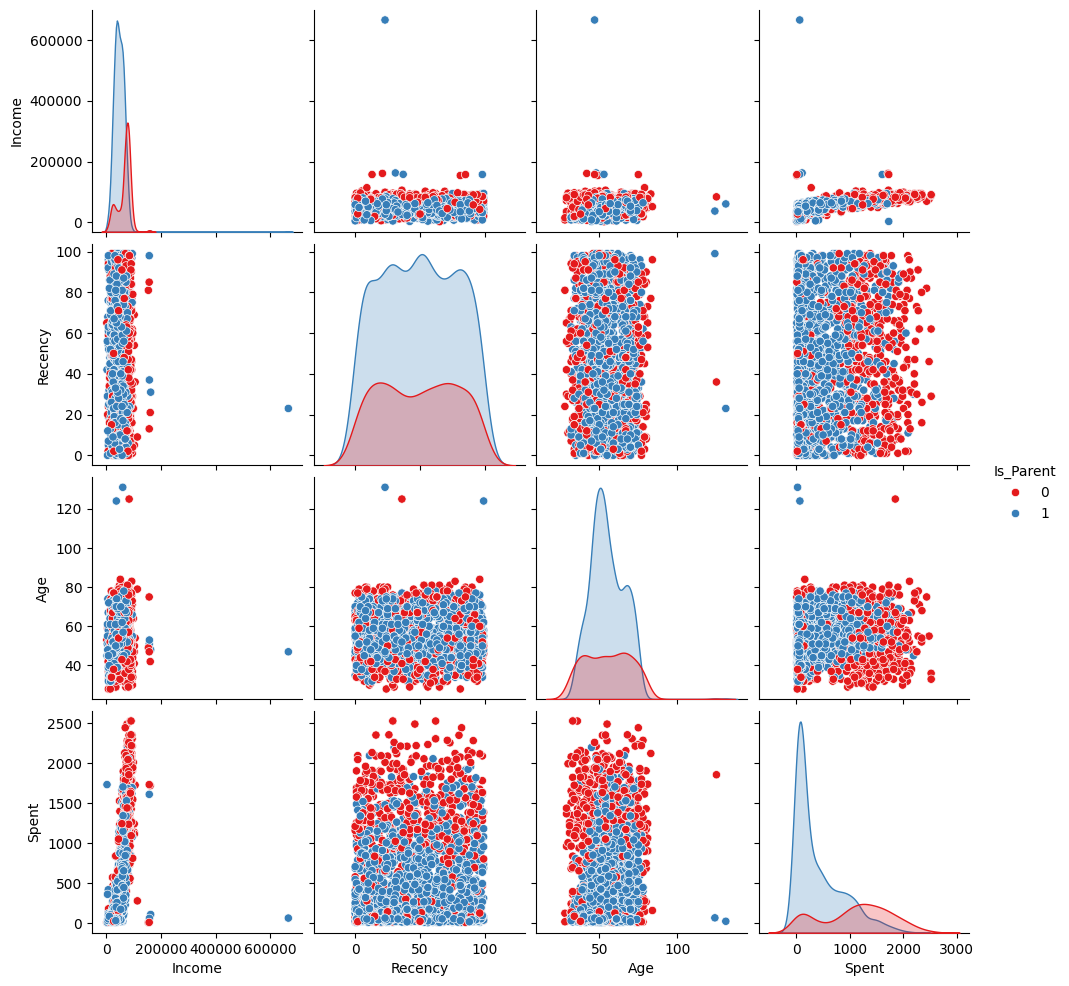

In [25]:
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent", palette='Set1')
plt.show()

## Estudio de outliers en Income y Age

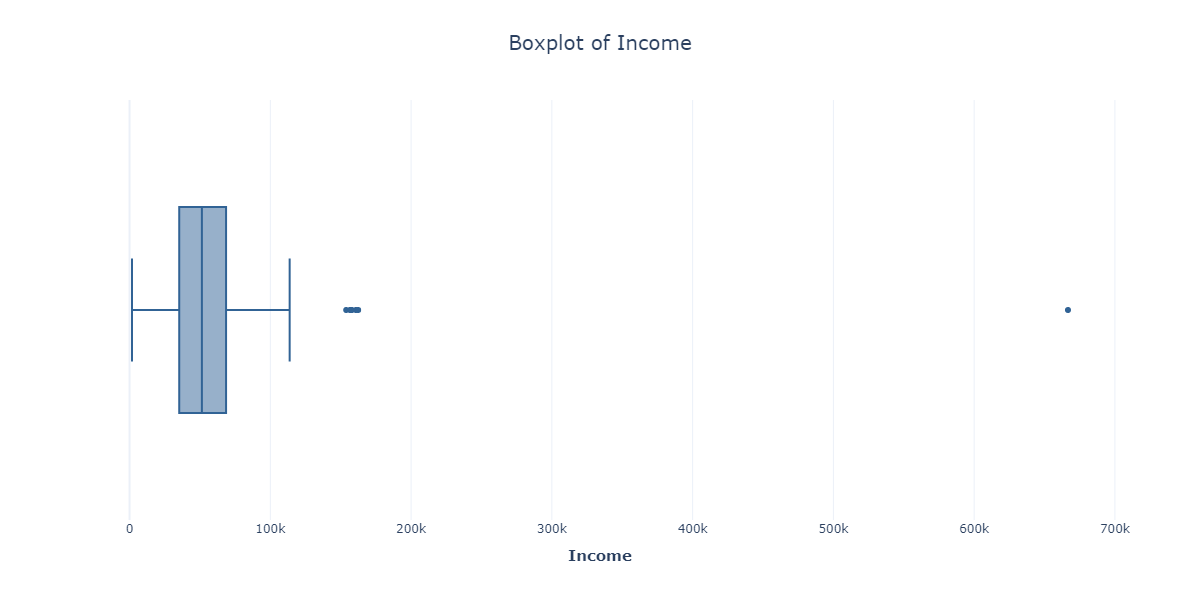

In [26]:
# Crear un boxplot de Magnitude por grupo de Profundidad
fig = px.box(df, x='Income',
             color_discrete_sequence=color_set,
             title='Boxplot of Income',
             height=600, width=1200)

fig.update_layout(
    xaxis_title="<b>Income</b>",
    title_x=0.5,
#    yaxis_title="<b></b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

#fig.show()
fig.show(renderer="png")

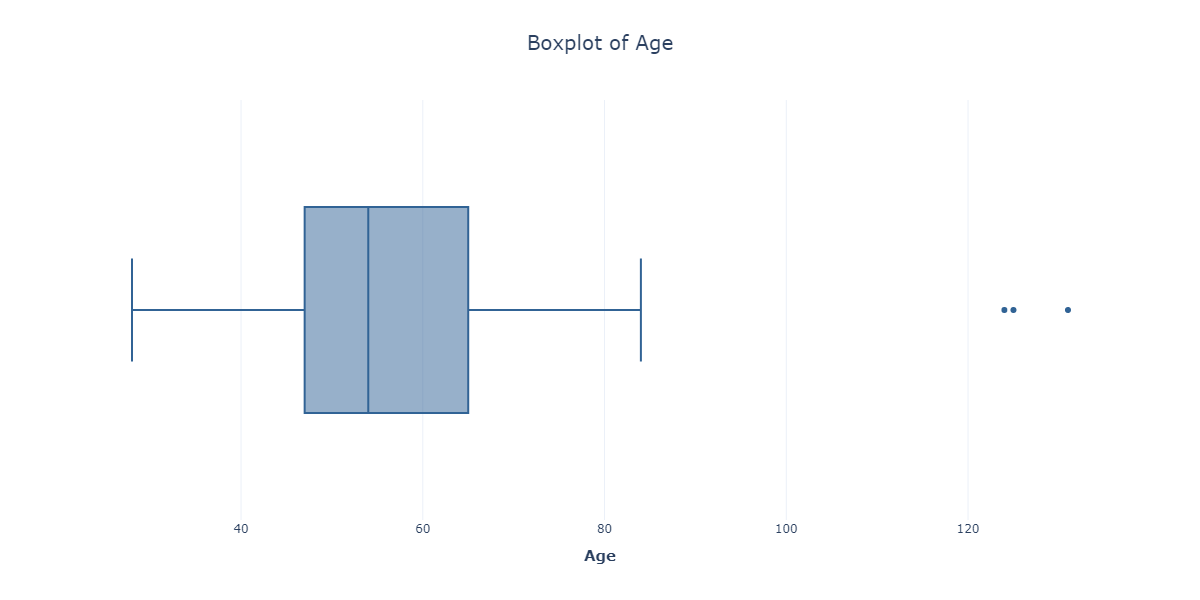

In [27]:
# Crear un boxplot de Magnitude por grupo de Profundidad
fig = px.box(df, x='Age',
             color_discrete_sequence=color_set,
             title='Boxplot of Age',
             height=600, width=1200)

fig.update_layout(
    xaxis_title="<b>Age</b>",
    title_x=0.5,
#    yaxis_title="<b></b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

#fig.show()
fig.show(renderer="png")

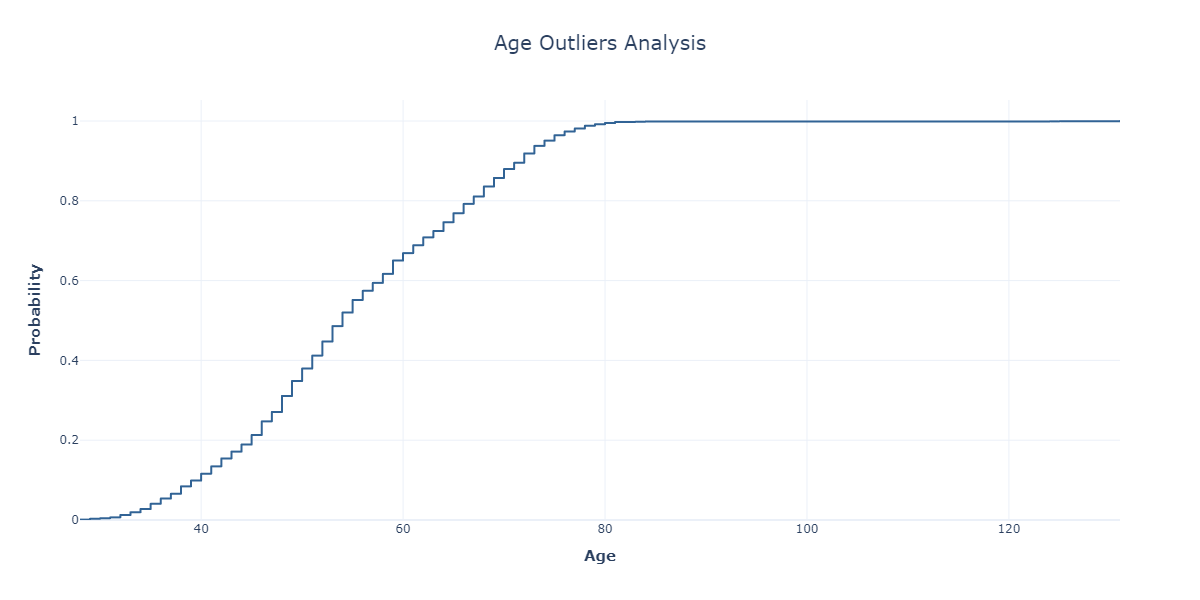

In [28]:
fig = px.ecdf(df, x='Age', title='Age Outliers Analysis', height=600, width=1200, color_discrete_sequence=color_set)
fig.update_layout(
    xaxis_title="<b>Age</b>",
    title_x=0.5,
    yaxis_title="<b>Probability</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)
#fig.show()
fig.show(renderer="png")

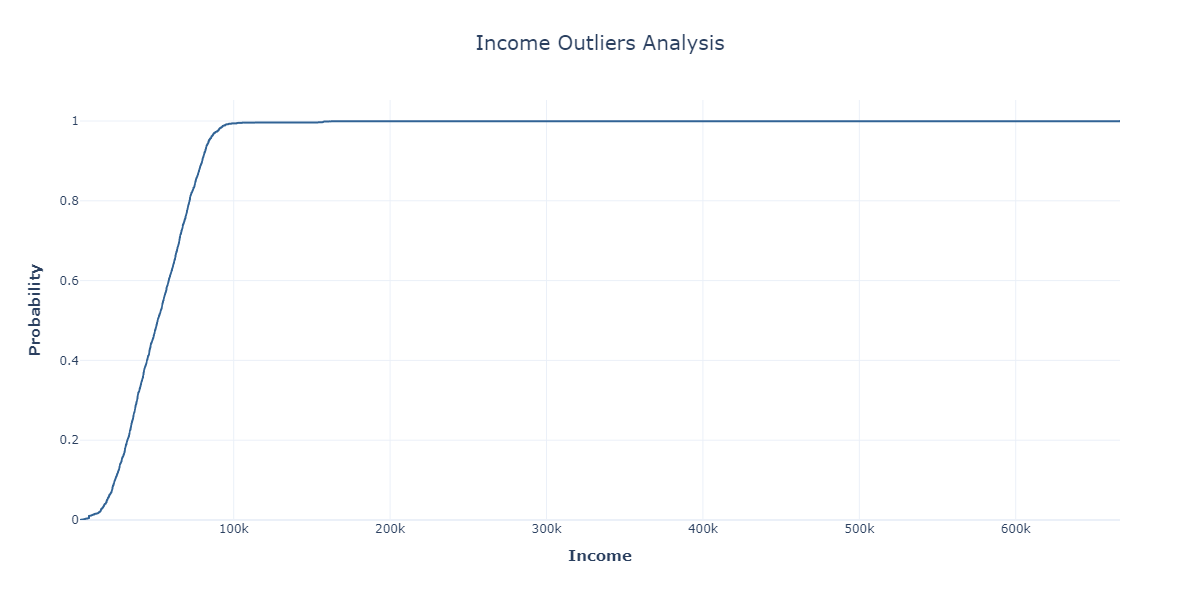

In [29]:
fig = px.ecdf(df, x='Income', title='Income Outliers Analysis', height=600, width=1200, color_discrete_sequence=color_set)
fig.update_layout(
    xaxis_title="<b>Income</b>",
    title_x=0.5,
    yaxis_title="<b>Probability</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)
#fig.show()
fig.show(renderer="png")

- En este caso, voy a decidir eliminar el outlier > 99% para Age
- Para el caso de Income, hay un solo outlier de 666k, solo eliminaré ese

In [30]:
df = df.loc[df['Age'] <= np.quantile(df['Age'], q=0.99)]

In [31]:
df = df[(df["Income"]<600000)]

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2197.0,51865.924442,21537.619769,1730.0,35178.0,51287.0,68397.0,162397.0
Kidhome,2197.0,0.444697,0.537539,0.0,0.0,0.0,1.0,2.0
Teenhome,2197.0,0.509331,0.544495,0.0,0.0,0.0,1.0,2.0
Recency,2197.0,48.995904,28.944147,0.0,24.0,49.0,74.0,99.0
Wines,2197.0,303.136550,336.396818,0.0,23.0,173.0,503.0,1493.0
Fruits,2197.0,26.230314,39.685234,0.0,1.0,8.0,33.0,199.0
Meat,2197.0,166.217114,224.079422,0.0,16.0,67.0,232.0,1725.0
Fish,2197.0,37.346837,54.533824,0.0,3.0,12.0,49.0,259.0
Sweets,2197.0,27.034137,41.107574,0.0,1.0,8.0,33.0,262.0
Gold,2197.0,44.072371,51.841980,0.0,9.0,25.0,57.0,321.0


## Correlaciones

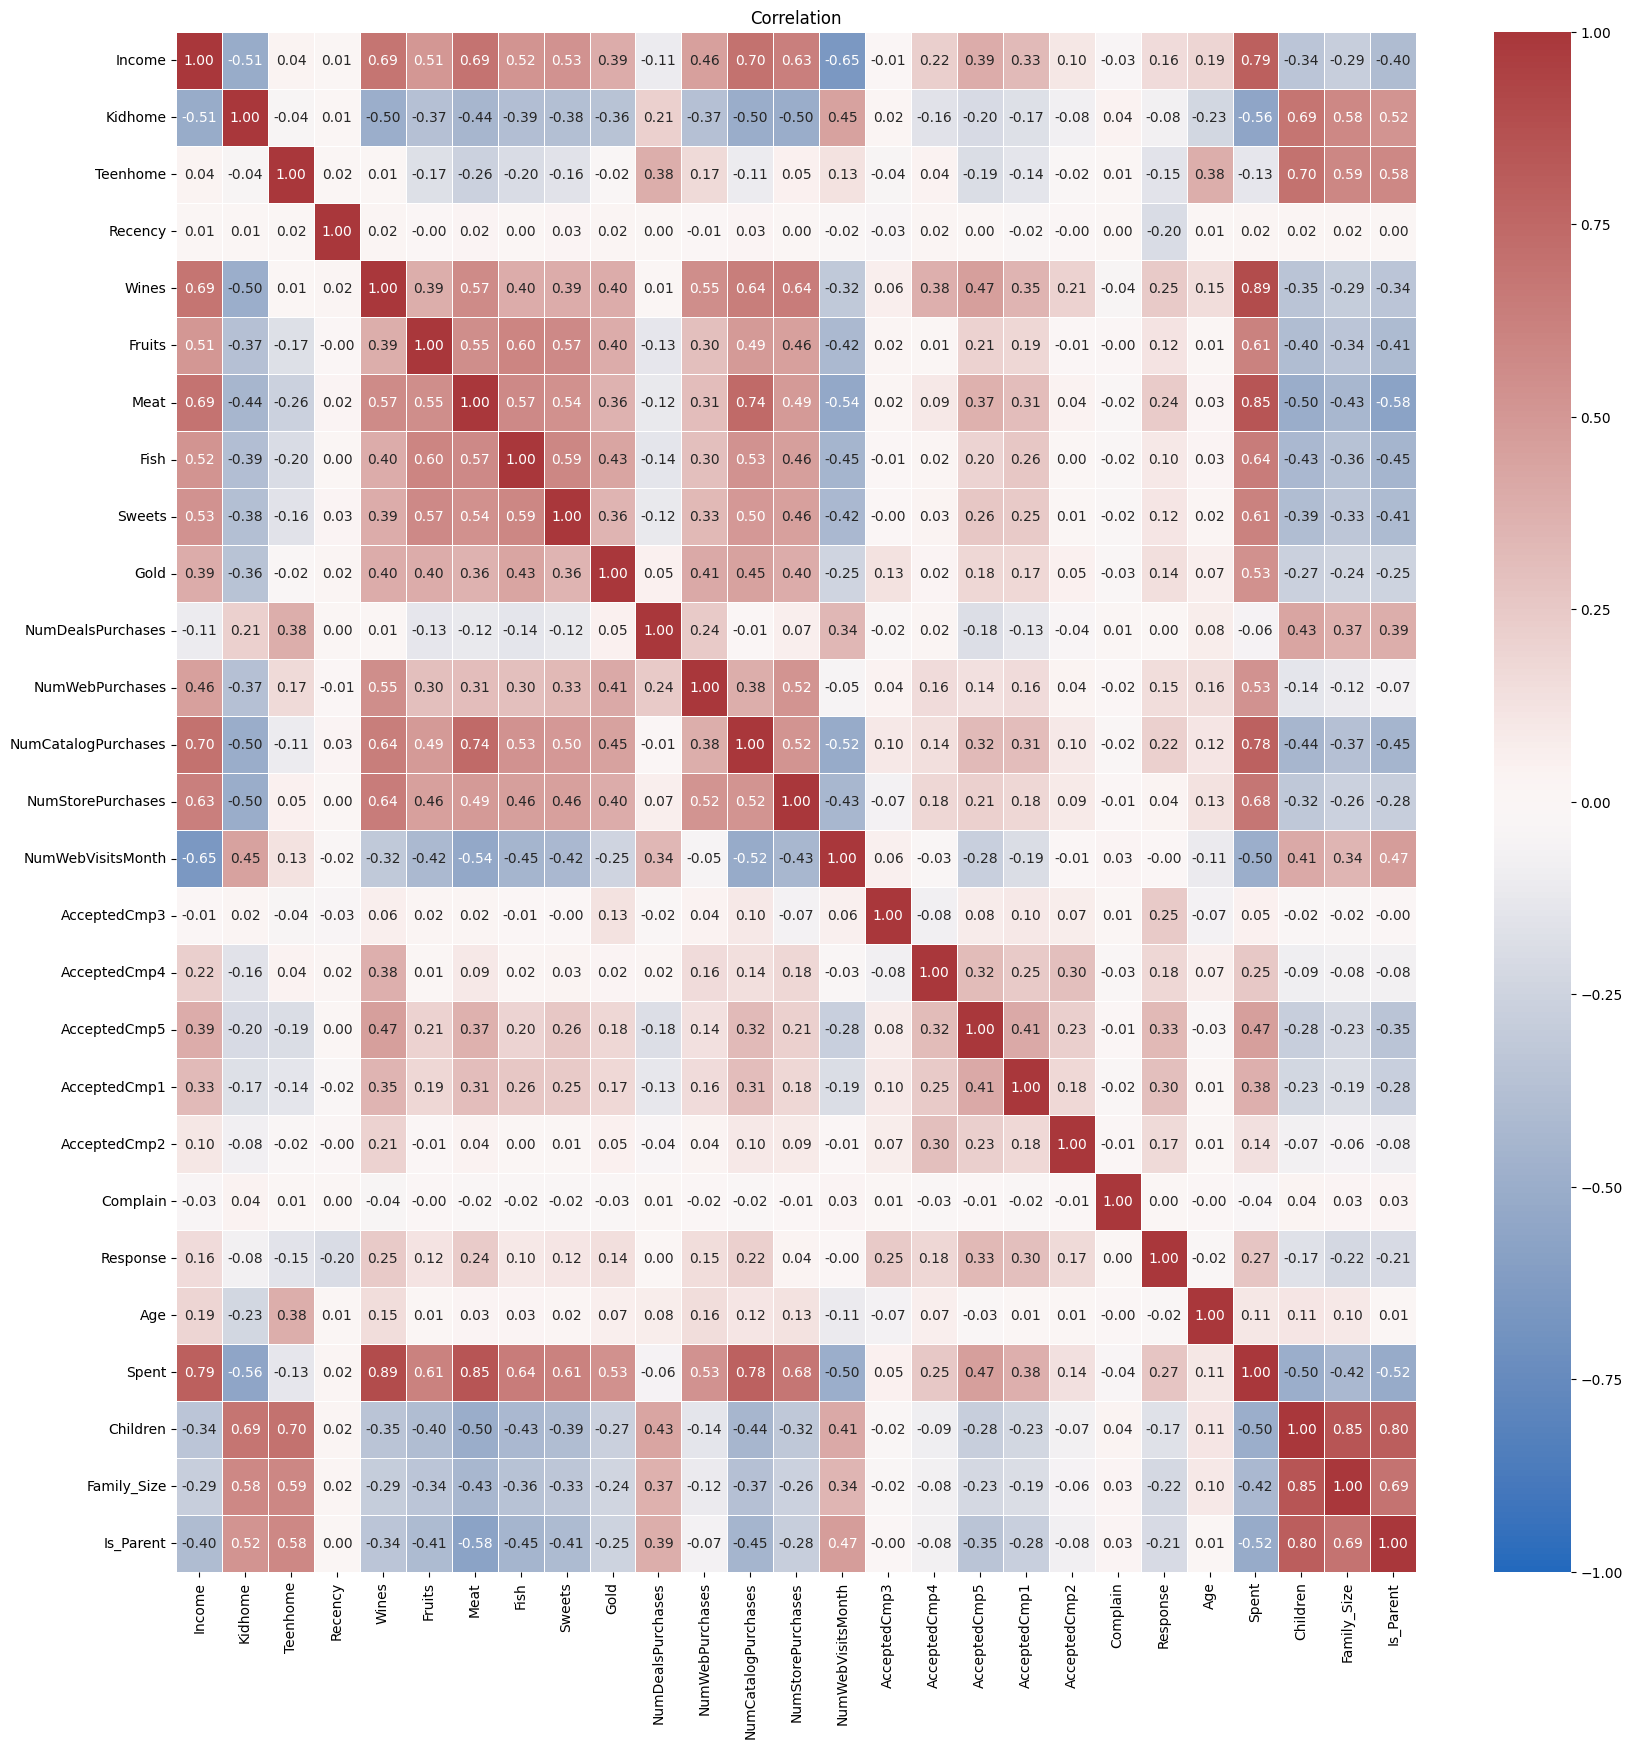

In [33]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap='vlag',
    vmin=-1, vmax=1,
    linecolor='white', linewidth=0.5,
    annot=True,
    fmt='.2f'
)
plt.title('Correlation')
plt.show()

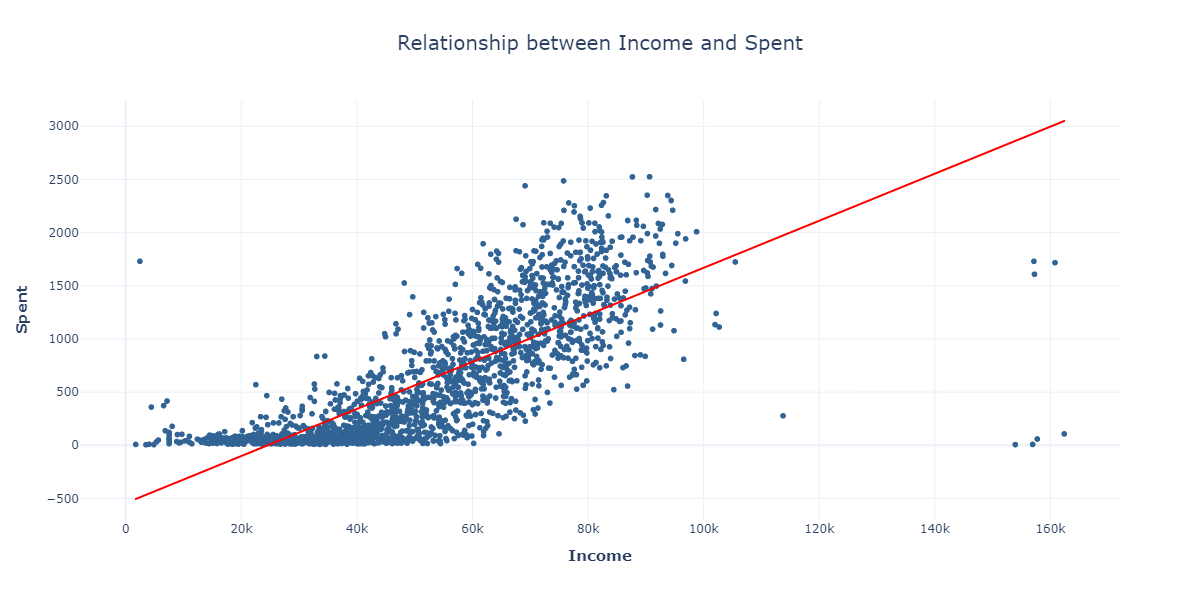

In [34]:
fig = px.scatter(data_frame=df, x='Income', y='Spent', 
                 color_discrete_sequence=color_set, 
                 title='Relationship between Income and Spent', height=600, width=1200,
                   trendline='ols', trendline_color_override="red"
)
fig.update_layout(
    xaxis_title="<b>Income</b>",
    title_x=0.5,
    yaxis_title="<b>Spent</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
)
#fig.show()
fig.show(renderer="png")

## Data Preprocessing

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [36]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [37]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [38]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [39]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.889929,0.291281,-0.827472,-0.935632,0.311156,0.986748,1.556845,1.695244,2.469730,1.483419,...,1.430893,2.518647,-0.552623,0.687567,1.047432,1.683897,-1.353213,-1.275892,-1.772054,-1.600243
1,-0.889929,-0.256443,1.033281,0.901350,-0.379987,-0.868626,-0.635905,-0.715164,-0.648311,-0.633461,...,-1.121677,-0.567312,-1.169238,-0.137664,1.307348,-0.959237,-1.353213,1.398855,0.441880,0.624905
2,-0.889929,0.917073,-0.827472,-0.935632,-0.794673,0.365317,0.573888,-0.175054,1.350903,-0.146822,...,1.430893,-0.224428,1.297219,-0.550279,0.354323,0.285862,0.738982,-1.275892,-0.665087,-1.600243
3,-0.889929,-1.171237,1.033281,-0.935632,-0.794673,-0.868626,-0.560293,-0.652672,-0.501580,-0.584798,...,-0.757024,-0.910197,-0.552623,0.274952,-1.291811,-0.916016,0.738982,0.061481,0.441880,0.624905
4,0.572430,0.298480,1.033281,-0.935632,1.555214,-0.386942,0.422664,-0.215228,0.158711,-0.000831,...,0.336935,0.118457,0.063991,-0.137664,-1.031895,-0.302609,0.738982,0.061481,0.441880,0.624905


## DIMENSIONALITY REDUCTION

- Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [40]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2197.0,8.408790e-17,2.876864,-5.915851,-2.537745,-0.776546,2.380366,7.444769
col2,2197.0,-2.587320e-17,1.705928,-4.294746,-1.352565,-0.138510,1.251389,6.113690
col3,2197.0,1.374514e-17,1.151113,-4.113225,-0.827673,0.173190,0.889129,2.863779


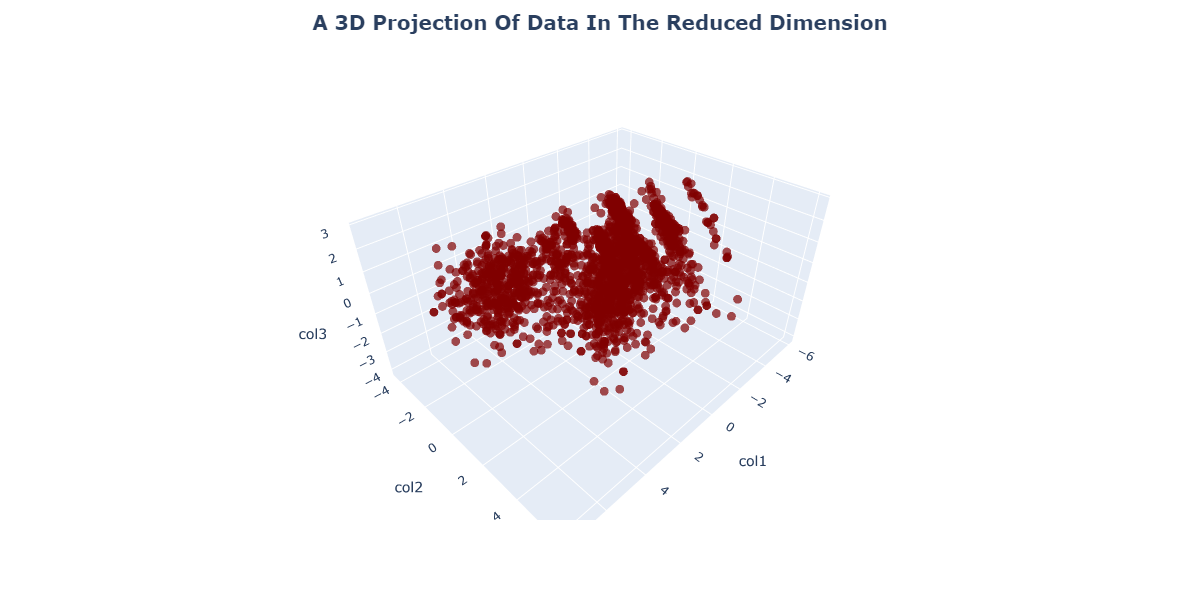

In [41]:
fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3', size_max=18, opacity=0.7)

# Personalizar el diseño del gráfico
fig.update_layout(title="<b>A 3D Projection Of Data In The Reduced Dimension</b>", autosize=False,
                  width=1200, height=600,
                  title_font_size = 20,
                  title_x=0.5)

# Ajustar el tamaño y color de los puntos
fig.update_traces(marker=dict(size=5, color='maroon')) 

# Mostrar el gráfico
fig.show(renderer="png")


## Clustering

Elbow Method to determine the number of clusters to be formed:


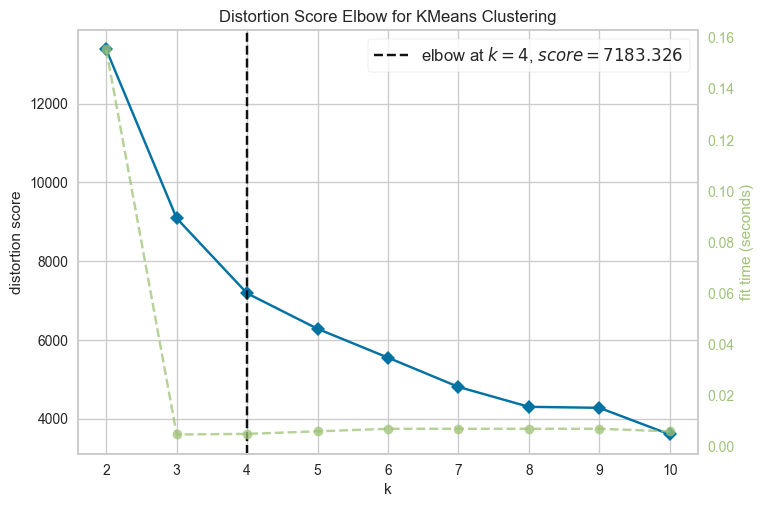

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [43]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

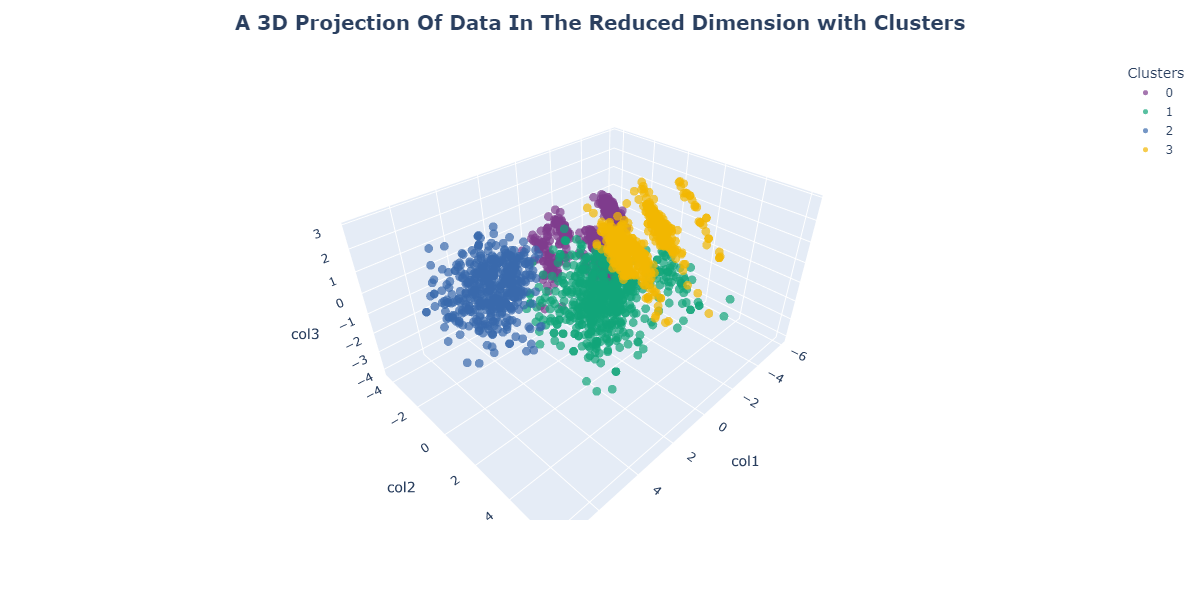

In [44]:
# Asegurarse de que los clusters sean tratados como categorías
PCA_ds['Clusters'] = PCA_ds['Clusters'].astype(str)

# Crear el gráfico 3D con clusters categóricos y leyenda ordenada
fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3', color='Clusters',
                    size_max=18, opacity=0.7, color_discrete_sequence=px.colors.qualitative.Bold,
                    category_orders={"Clusters": sorted(PCA_ds['Clusters'].unique())})

# Personalizar el diseño del gráfico
fig.update_layout(title="<b>A 3D Projection Of Data In The Reduced Dimension with Clusters</b>", 
                  autosize=False, width=1200, height=600,
                  title_font_size=20, title_x=0.5)

# Ajustar el tamaño de los puntos
fig.update_traces(marker=dict(size=5))

# Mostrar el gráfico
fig.show(renderer="png")


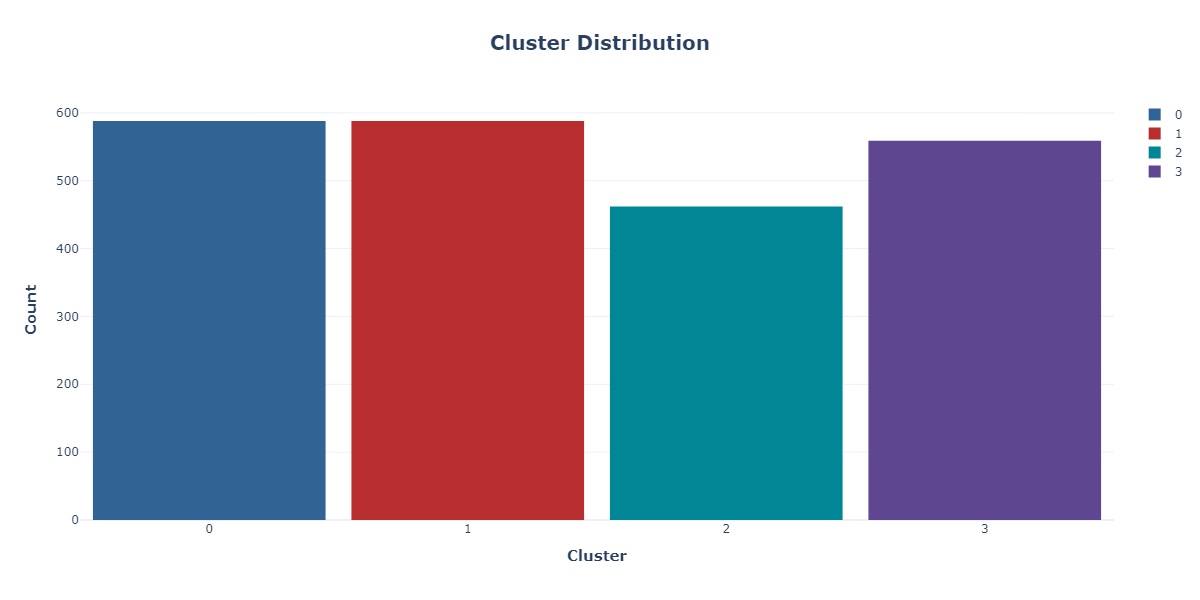

In [45]:
import plotly.express as px

# Convertir 'Clusters' a string para asegurar que se maneje como texto
df['Clusters'] = df['Clusters'].astype(str)

# Obtener las categorías únicas en orden inverso
sorted_categories = sorted(df['Clusters'].unique(), reverse=True)

# Crear el histograma con clusters categóricos
fig = px.histogram(data_frame=df, x='Clusters', 
                   color='Clusters', color_discrete_sequence=color_set, 
                   title='<b>Cluster Distribution</b>', 
                   height=600, width=1200,
                   category_orders={'Clusters': ['0', '1', '2', '3']})

# Personalizar el diseño del gráfico
fig.update_layout(bargap=0.1,
                  template="plotly_white",
                  xaxis_title='<b>Cluster</b>',
                  yaxis_title='<b>Count</b>',
                  legend_title='',
                  title_font_size=20,
                  xaxis_title_font_size=15,
                  yaxis_title_font_size=15,
                  title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=sorted_categories, ticktext=sorted_categories))

# Mostrar el gráfico
fig.show(renderer="png")


In [46]:
# Calculate the mean values of the numeric features for each cluster
numeric_features = ['Income', 'Spent']
cluster_summary_numeric = df.groupby('Clusters')[numeric_features].mean()
display(cluster_summary_numeric)

,Income,Spent
Clusters,,
0,30582.824830,96.482993
1,62848.976190,904.517007
2,76425.257576,1396.404762
3,42402.626118,166.982111


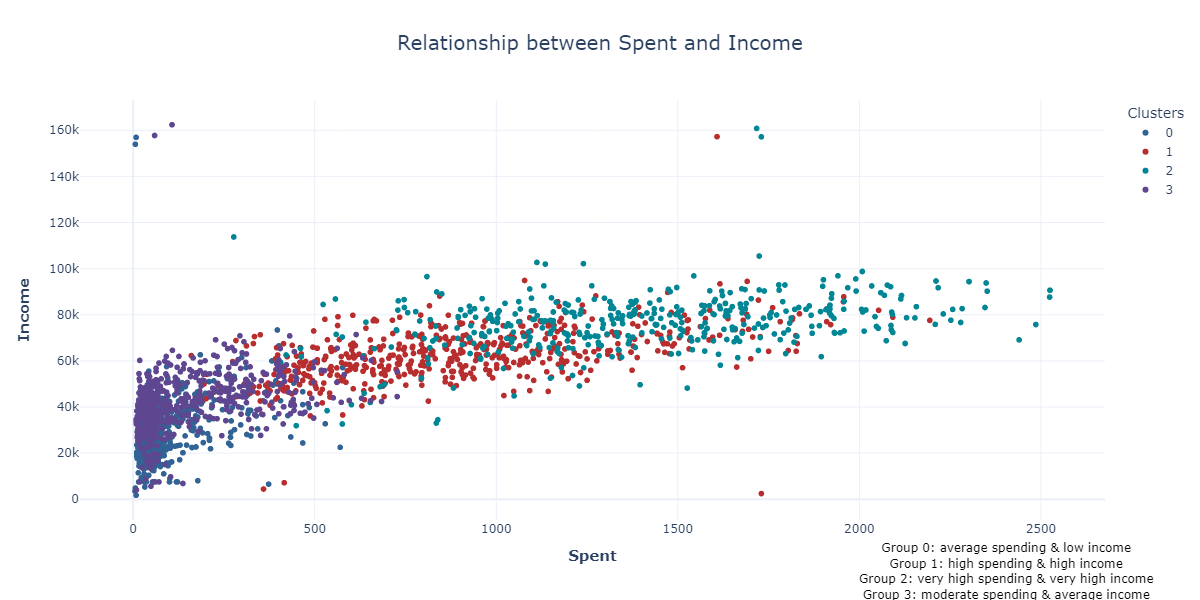

In [47]:
# Crear el gráfico de dispersión
fig = px.scatter(data_frame=df, x='Spent', y='Income', 
                 color='Clusters', color_discrete_sequence=color_set, 
                 title='Relationship between Spent and Income', 
                 height=600, width=1200,
                 category_orders={'Clusters': ['0', '1', '2', '3']})

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title="<b>Spent</b>",
    title_x=0.5,
    yaxis_title="<b>Income</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
    annotations=[
        dict(
            xref='paper', yref='paper',
            x=1.05, y=-0.20,
            text="Group 0: average spending & low income<br>Group 1: high spending & high income<br>Group 2: very high spending & very high income<br>Group 3: moderate spending & average income",
            showarrow=False,
            font=dict(size=12, color='black'),
            align='center'
        )
    ]
)

# Mostrar el gráfico
fig.show(renderer="png")

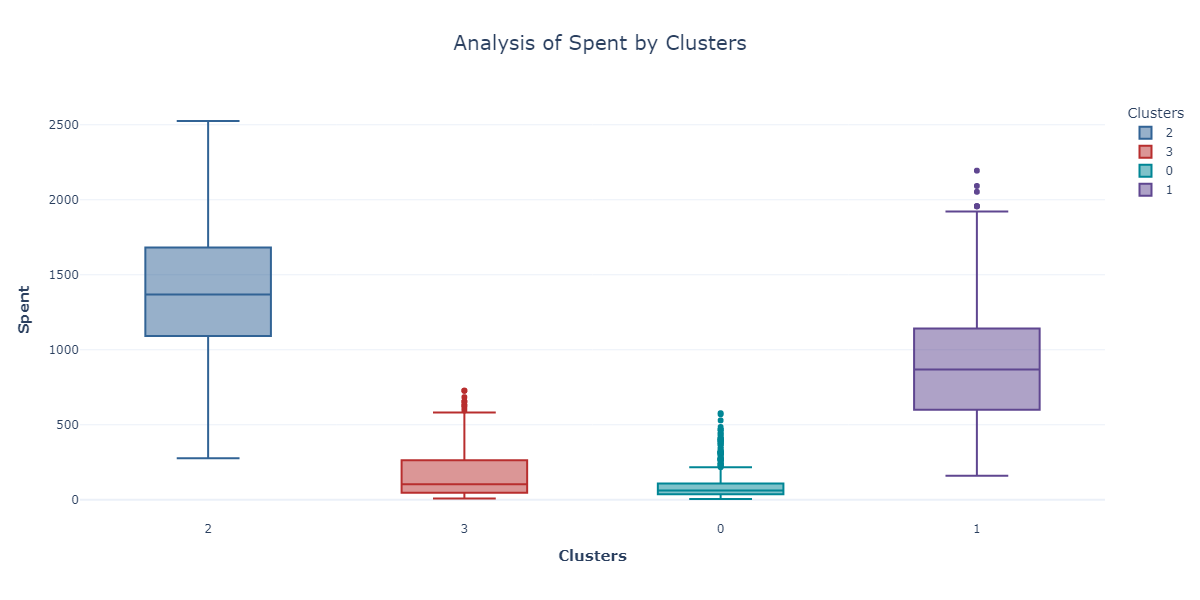

In [50]:
# Crear un boxplot de Magnitude por grupo de Profundidad
fig = px.box(df, x='Clusters', y='Spent',
             color_discrete_sequence=color_set,
             title='Analysis of Spent by Clusters',
             height=600, width=1200,
             color = 'Clusters')

fig.update_layout(
    xaxis_title="<b>Clusters</b>",
    title_x=0.5,
    yaxis_title="<b>Spent</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

#fig.show()
fig.show(renderer="png")

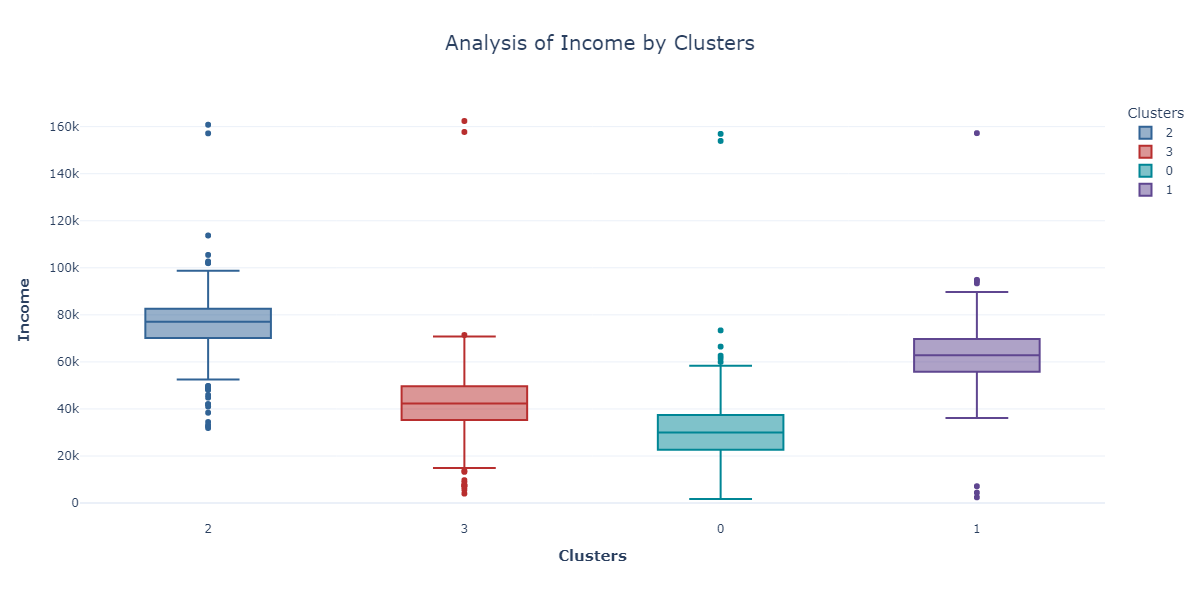

In [51]:
# Crear un boxplot de Magnitude por grupo de Profundidad
fig = px.box(df, x='Clusters', y='Income',
             color_discrete_sequence=color_set,
             title='Analysis of Income by Clusters',
             height=600, width=1200,
             color = 'Clusters')

fig.update_layout(
    xaxis_title="<b>Clusters</b>",
    title_x=0.5,
    yaxis_title="<b>Income</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

#fig.show()
fig.show(renderer="png")

## Profiling

<Figure size 800x550 with 0 Axes>

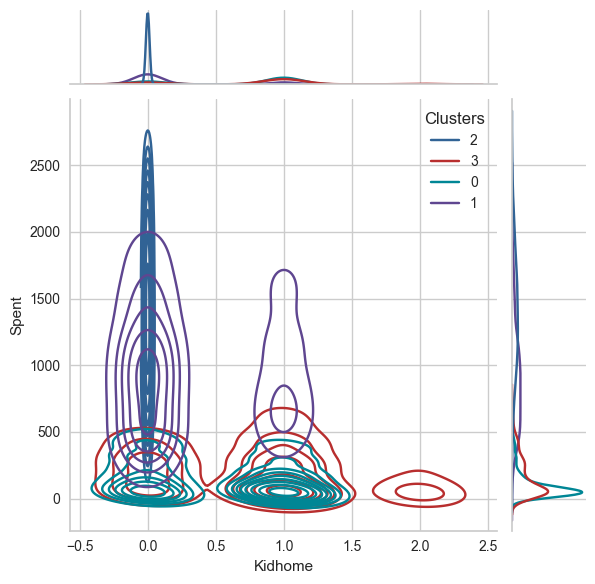

c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

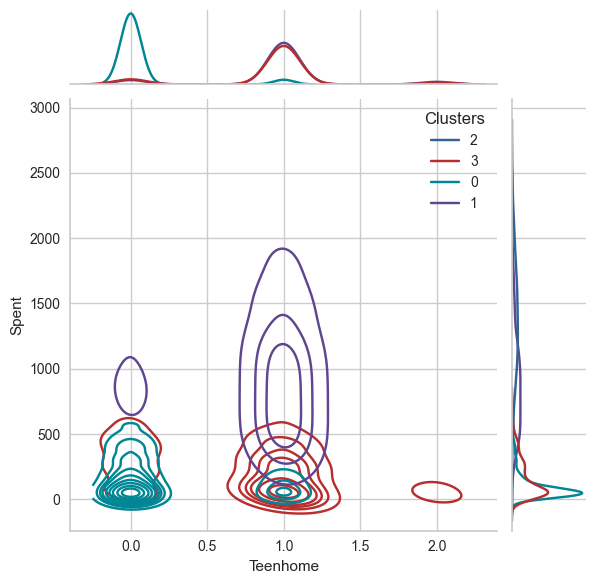

<Figure size 800x550 with 0 Axes>

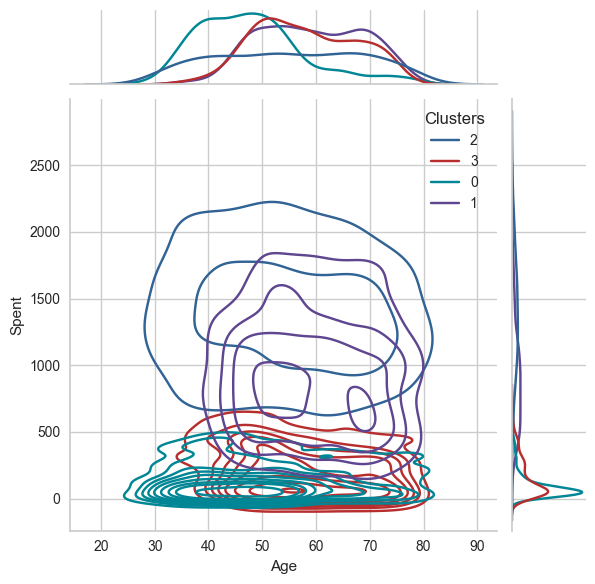

<Figure size 800x550 with 0 Axes>

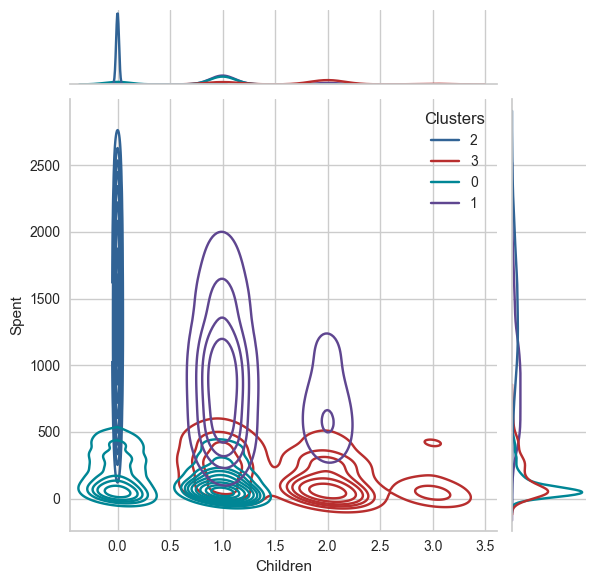

<Figure size 800x550 with 0 Axes>

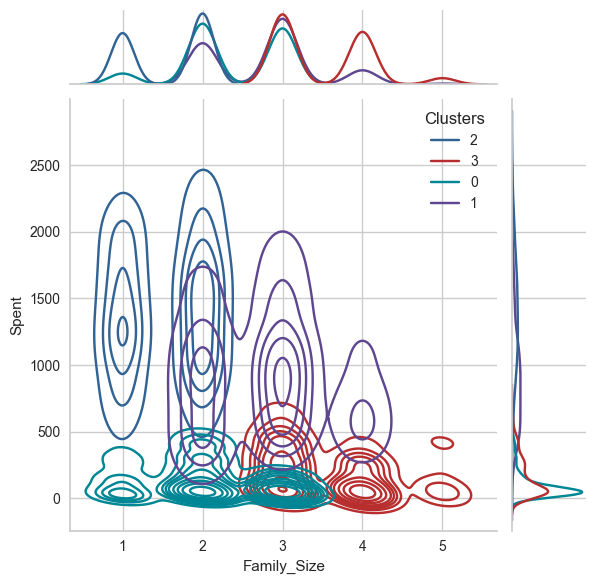

c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

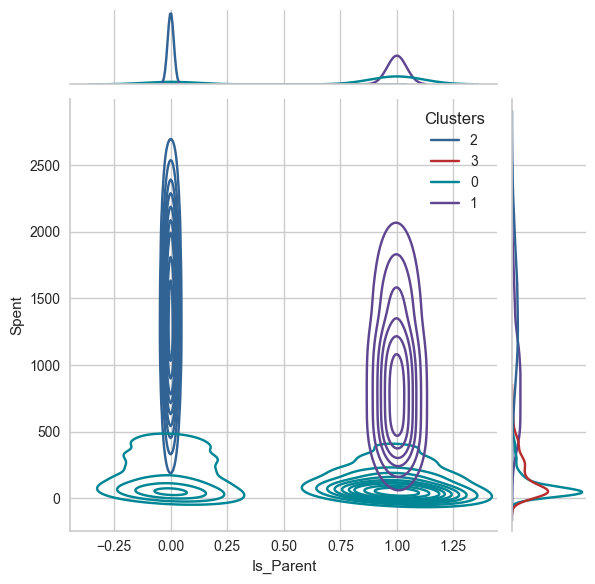

<Figure size 800x550 with 0 Axes>

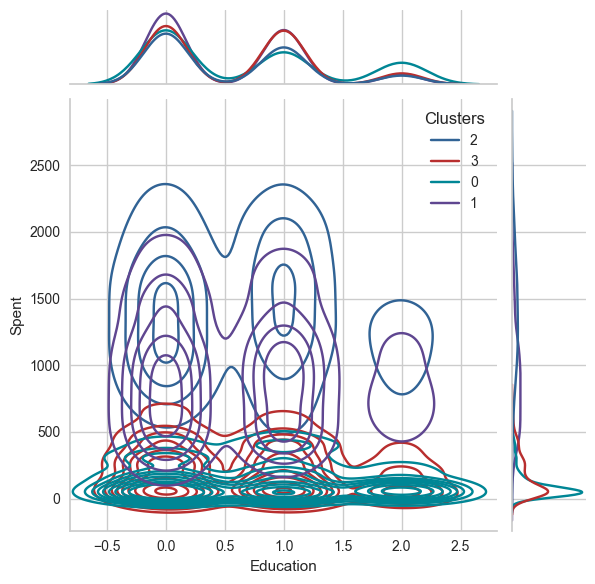

<Figure size 800x550 with 0 Axes>

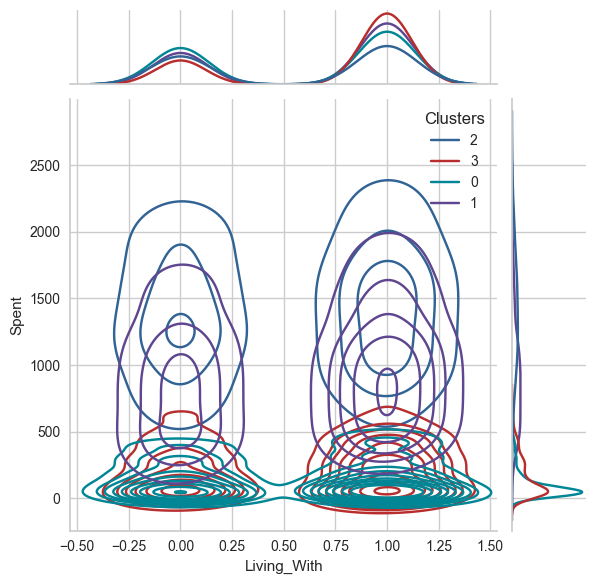

In [60]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=['#316395', '#b82e2e', '#008695', '#5f4690'])
    plt.show()